In [13]:
%load_ext autoreload
%autoreload 2
import sys
import os
project_root = os.path.abspath("")
if project_root not in sys.path:
    sys.path.append(project_root)
import pandas as pd
import numpy as np 
from pathlib import Path
import utils.metrics_utils
from utils.metrics_utils import * 
from utils.visualization_utils import *
from utils.visualization_utils import _load_tracking_and_behavior
import harp
from ipywidgets import widgets
from IPython.display import display

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


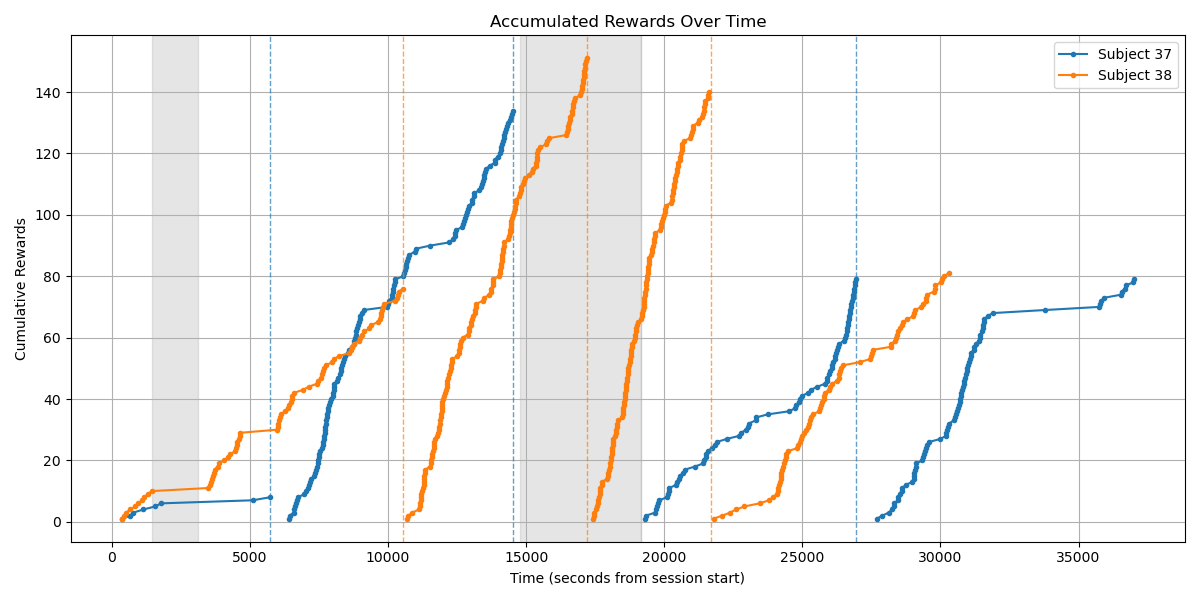

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Accumulated Rewards Over Time'}, xlabel='Time (seconds from session start)', ylabel='Cumulative Rewards'>)

In [2]:
plot_cumulative_rewards(subjids=[37, 38], dates=[20251017, 20251020, 20251021, 20251022], split_days=True)

Loaded SLEAP tracking: 197428 frames from sub-038_ses-20251027_combined_sleap_tracking_timestamps.csv


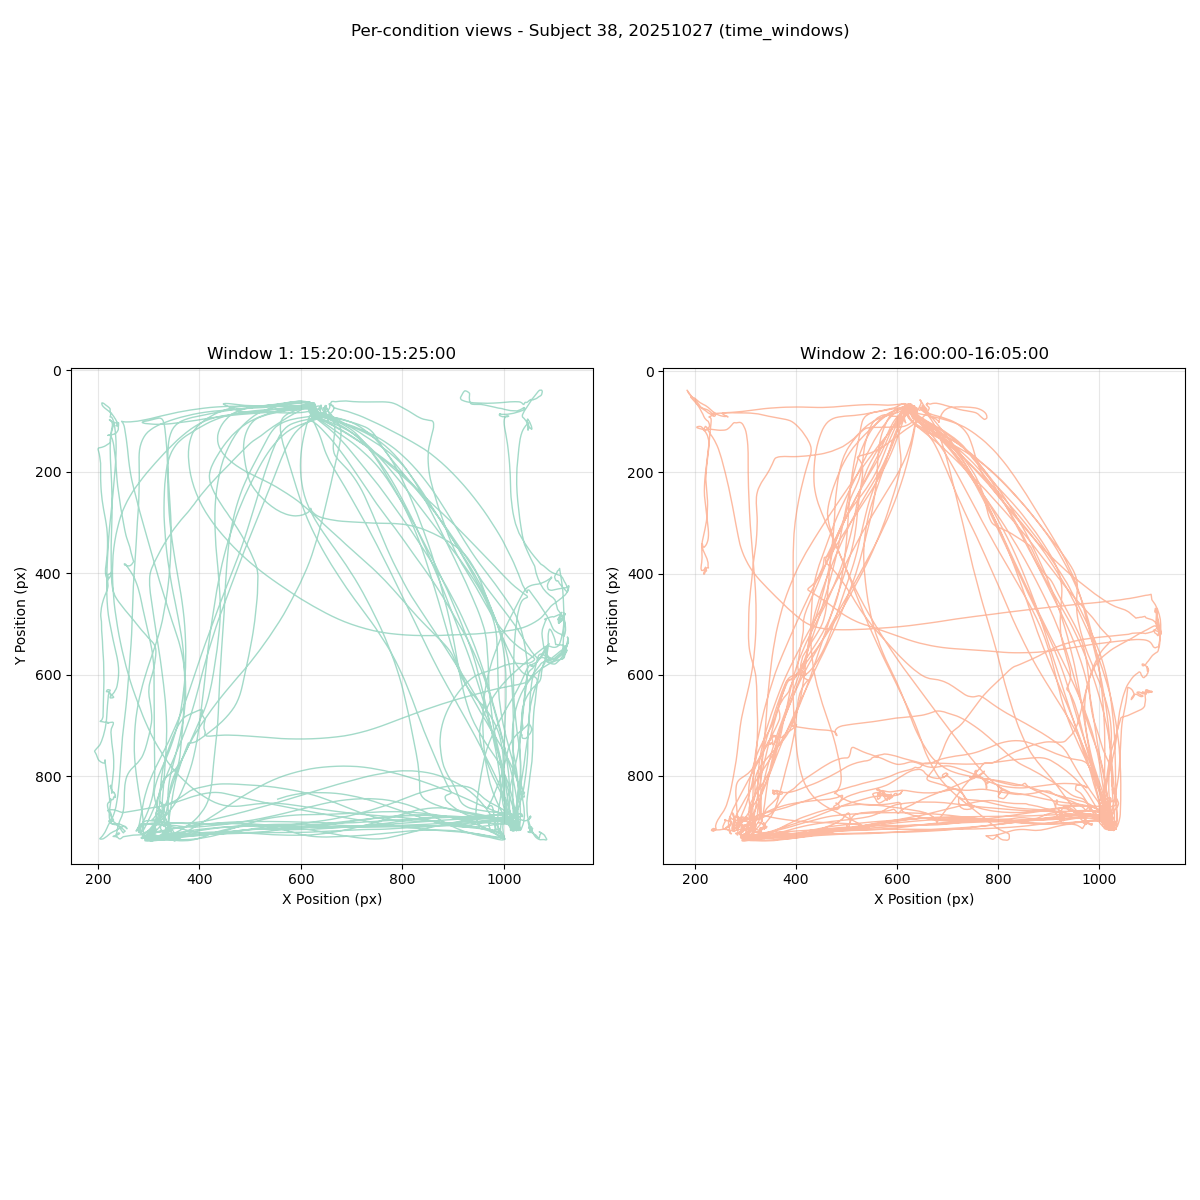

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Movement - Subject 38, 20251027 (time_windows)'}, xlabel='X Position (pixels)', ylabel='Y Position (pixels)'>)

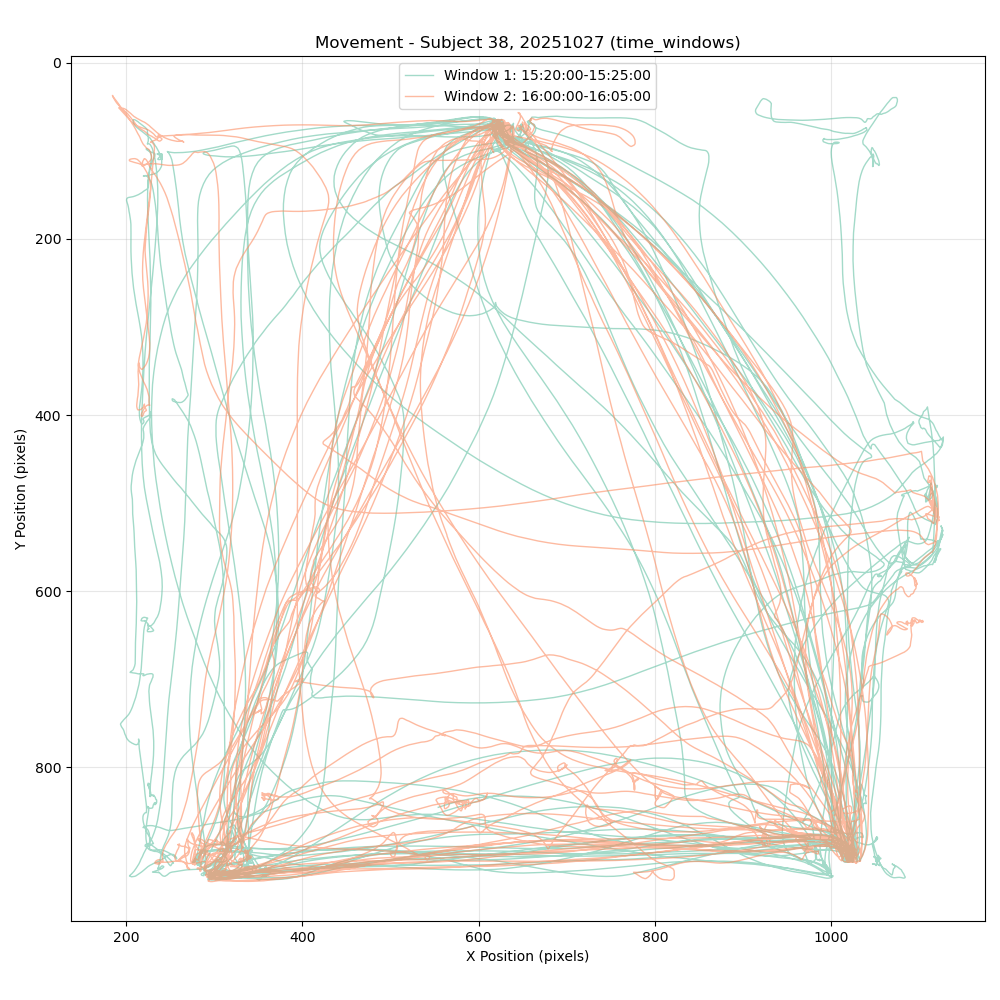

In [21]:
# modes can be simple (all movement), trial_state (within trial vs outside), last_odor (A vs B), trial_windows (one or more trial windows), time_windows (one or more time windows)
# for trial_windows: trial_windows=[(0, 20), (-20,0)] will plot first vs last 20 trials
# for time_windows: time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")] will plot 2 5-minute windows
plot_movement_with_behavior(38, 20251027, mode='time_windows', time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")])#last_odor_colors={'OdorA':'red','OdorB':'blue','other':'green'})

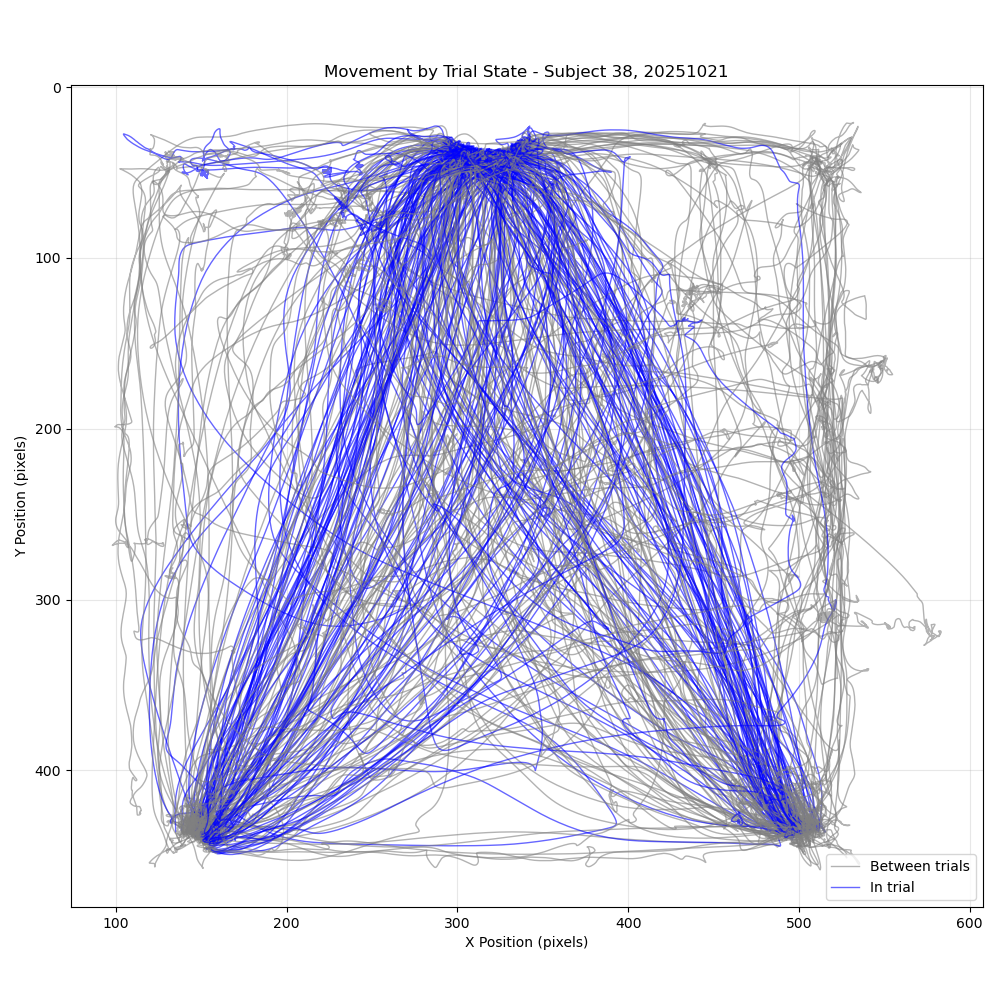

In [12]:
fig, ax = plot_movement_by_trial_state(38, 20251021, in_trial_color='blue', out_trial_color='grey')

Loading tracking data from: sub-038_ses-20251021_combined_tracking_with_timestamps.csv


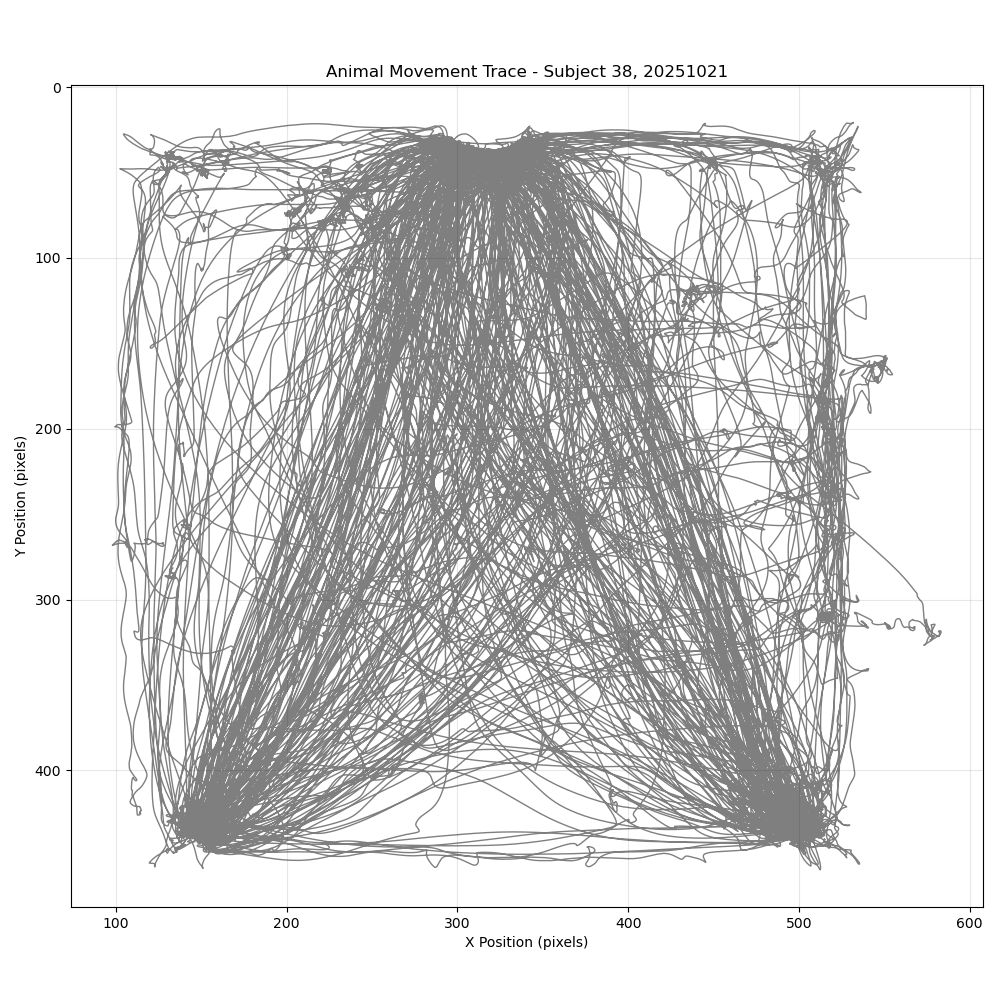

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Animal Movement Trace - Subject 38, 20251021'}, xlabel='X Position (pixels)', ylabel='Y Position (pixels)'>)

In [8]:
plot_movement_trace(subjid=38, date=20251021,
                    smooth_window=10,
                    linewidth=1,
                    alpha=0.5,)

In [ ]:
plt.close('all')

In [6]:
tracking_times = add_timestamps_to_tracking(38, 20251027)

Found 3 tracking file(s)
Found 1 experiment folder(s)
Using subject directory: /Users/joschua/repos/harris_lab/hypnose/hypnose-analysis/data/rawdata/sub-038_id-235
Loaded experiment: /Users/joschua/repos/harris_lab/hypnose/hypnose-analysis/data/rawdata/sub-038_id-235/ses-008_date-20251027/behav/2025-10-27T15-02-39
  Loaded 290278 frames from experiment 0
Total: 290,278 frames from 3 video file(s)
Processing VideoData_1904-01-01T00-00-00.avi: 55705 tracking frames
Processing VideoData_1904-01-01T01-00-00.avi: 216009 tracking frames
Processing VideoData_1904-01-01T02-00-00.avi: 18564 tracking frames
Saved: /Volumes/harris/hypnose/derivatives/sub-038_id-235/ses-008_date-20251027/saved_analysis_results/sub-038_ses-20251027_combined_tracking_with_timestamps.csv
Combined: 290,278 frames, 80.7 minutes


# Debugging


In [12]:
combined_sleap = add_timestamps_to_sleap_tracking(38, 20251027)

Found 1 SLEAP tracking file(s)
Found 1 experiment folder(s) with 1 video file(s) total
  Loaded 290278 frames from experiment 0
Total: 290,278 frames from 3 video file(s)
Matched sleap_tracking_video2.csv to video VideoData_1904-01-01T01-00-00.avi (frames 0-216008, overlap: 216008)
Processing sleap_tracking_video2.csv with 197428 frames

Saved: /Volumes/harris/hypnose/derivatives/sub-038_id-235/ses-008_date-20251027/saved_analysis_results/sub-038_ses-20251027_combined_sleap_tracking_timestamps.csv
Combined: 197,428 frames, 60.0 minutes


In [11]:
combined_sleap_df = pd.read_csv("/Volumes/harris/hypnose/derivatives/sub-038_id-235/ses-008_date-20251027/saved_analysis_results/sub-038_ses-20251027_combined_sleap_tracking_timestamps.csv")

# Convert time column to datetime
combined_sleap_df['time'] = pd.to_datetime(combined_sleap_df['time'])

print(f"Total rows: {len(combined_sleap_df)}")
print(f"First time: {combined_sleap_df['time'].min()}")
print(f"Last time: {combined_sleap_df['time'].max()}")
duration_minutes = (combined_sleap_df['time'].max() - combined_sleap_df['time'].min()).total_seconds() / 60
print(f"Duration: {duration_minutes:.1f} minutes")

print(f"\nFrame range: {combined_sleap_df['frame'].min()} to {combined_sleap_df['frame'].max()}")
print(f"Frame count: {combined_sleap_df['frame'].max() - combined_sleap_df['frame'].min() + 1:.0f}")
print(f"Expected duration at 60fps: {(combined_sleap_df['frame'].max() - combined_sleap_df['frame'].min() + 1) / 60 / 60:.1f} minutes")


Total rows: 197428
First time: 2025-10-27 15:02:38.891488
Last time: 2025-10-27 15:18:09.998400
Duration: 15.5 minutes

Frame range: 0 to 216008
Frame count: 216009
Expected duration at 60fps: 60.0 minutes


/var/folders/ql/hky02t9j56z42hshgq2j3xym0000gp/T/ipykernel_6345/2621364203.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_sleap_df = pd.read_csv("/Volumes/harris/hypnose/derivatives/sub-038_id-235/ses-008_date-20251027/saved_analysis_results/sub-038_ses-20251027_combined_sleap_tracking_timestamps.csv")
